# Trabajo Final Programacion II - TUIA
# Análisis de los movimientos migratorios mundiales

# 1 Descripción y preparación de los datos

Trabajamos con 2 datasets:
1. **World Population 2022** [Descargar](https://www.kaggle.com/datasets/ahmadjalalmasood123/world-population-dataset)

> Autor: United Nations, Department of Economic and Social Affairs, Population Division

> Vamos a trabajar con estas variables:

* **Country**: Nombre del país
* **Population**: Población total del país, medido en cantidad de habitantes.
* **Net Change**: Variación anual de la población del país repecto del año anterior.
* **Migrants**: Total de migrantes en el año, puede ser positivo si ingresan al país o negativo si se van del país.

2. **Countries of the world** [Descargar](https://www.kaggle.com/datasets/fernandol/countries-of-the-world)

> Autor: US government

> Vamos a trabajar con estas variables:

* **Country**: Nombre del país
* **Region**: Nombre de la región
* **GDP**: Gross Domestic Product (GDP) per capita.
El GDP/PIB per cápita, ingreso per cápita o renta per cápita es un indicador económico que mide la relación existente entre el nivel de renta de un país y su población. Para ello, se divide el Producto Interior Bruto (PIB) de dicho territorio entre el número de habitantes.





In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#seteos generales
pd.options.display.float_format = '{:,.1f}'.format 

## 1.1 Preparación de los datos de dataset: World Population 2022

In [ ]:
#Leo archivo original
population_0 = pd.read_csv('World Population (2022) .csv')
population_0.head()
#Armo dataset con las columnas que me interesan
population = population_0[['Country (or dependency)','Population (2022)', 'Net change','Migrants (net)']].copy()
population.rename(columns={'Country (or dependency)': 'Country', 'Population (2022)': 'Population', 'Migrants (net)':'Migrants'}, inplace=True)
#cambio los tipos de population, net change y migrants a int
population['Population'] = population['Population'].apply(lambda x: x.replace(',',''))
population['Population'] = population['Population'].astype('float')
population['Net change'] = population['Net change'].apply(lambda x: x.replace(',',''))
population['Net change'] = population['Net change'].astype('float')
def cambiar_coma(x):
  if isinstance(x, str): 
    return x.replace(',','')

population['Migrants'] = population['Migrants'].apply(cambiar_coma)
population['Migrants'].fillna(0,inplace=True)
population['Migrants'] = population['Migrants'].astype('float')
population
#population.dtypes

,Country,Population,Net change,Migrants
0,China,"1,439,323,776.0","5,540,090.0","-348,399.0"
1,India,"1,380,004,385.0","13,586,631.0","-532,687.0"
2,United States,"331,002,651.0","1,937,734.0","954,806.0"
3,Indonesia,"273,523,615.0","2,898,047.0","-98,955.0"
4,Pakistan,"220,892,340.0","4,327,022.0","-233,379.0"
...,...,...,...,...
230,Montserrat,"4,992.0",3.0,0.0
231,Falkland Islands,"3,480.0",103.0,0.0
232,Niue,"1,626.0",11.0,0.0
233,Tokelau,"1,357.0",17.0,0.0


In [ ]:
population['Population'].describe()

count             235.0
mean       33,171,202.7
std       135,136,985.3
min               801.0
25%           418,801.5
50%         5,459,642.0
75%        20,577,053.0
max     1,439,323,776.0
Name: Population, dtype: float64

In [ ]:
population['Net change'].describe()

count          235.0
mean       346,105.8
std      1,128,254.8
min       -383,840.0
25%            424.0
50%         39,170.0
75%        249,660.0
max     13,586,631.0
Name: Net change, dtype: float64

In [ ]:
population['Migrants'].describe()

count        235.0
mean          -4.7
std      113,983.5
min     -653,249.0
25%       -8,608.0
50%            0.0
75%        4,900.0
max      954,806.0
Name: Migrants, dtype: float64

## 1.2 Preparación de los datos de dataset: Countries of the world

In [ ]:

#Leo archivo original
#Nota: los decimales vienen con coma, se lo indico a pandas
countries_0 = pd.read_csv('countries of the world.csv',decimal=",")
countries_0.head()
#Armo dataset con las columnas que me interesan
countries = countries_0[['Country','Region','GDP ($ per capita)']].copy()
countries.rename(columns={'GDP ($ per capita)': 'GDP'}, inplace=True)
#hay un espacio final en el nombre del Country que afecta el merge entre datasets
countries['Country'] = countries['Country'].apply(lambda x: x.strip())
countries['Region'] = countries['Region'].apply(lambda x: x.strip())
#un dataset usa and y el otro &
countries['Country'] = countries['Country'].apply(lambda x: x.replace('&','and'))
countries
#countries.dtypes

,Country,Region,GDP
0,Afghanistan,ASIA (EX. NEAR EAST),700.0
1,Albania,EASTERN EUROPE,"4,500.0"
2,Algeria,NORTHERN AFRICA,"6,000.0"
3,American Samoa,OCEANIA,"8,000.0"
4,Andorra,WESTERN EUROPE,"19,000.0"
...,...,...,...
222,West Bank,NEAR EAST,800.0
223,Western Sahara,NORTHERN AFRICA,NaN
224,Yemen,NEAR EAST,800.0
225,Zambia,SUB-SAHARAN AFRICA,800.0


## 1.3 Chequeo si la variable *Country* puede ser índice en los datasets

In [ ]:

print(population['Country'].duplicated().sum())
print(len(population['Country']), len(population['Country'].unique()))

print(countries['Country'].duplicated().sum())
print(len(countries['Country']), len(countries['Country'].unique()))

0
235 235
0
227 227


In [ ]:
population.set_index('Country', inplace=True)

In [ ]:
countries.set_index('Country', inplace=True)

## 1.4 Merge de los dos datasets por el campo Country

In [ ]:
unificado = pd.merge(population, countries, on='Country', how='left')

In [ ]:
unificado[unificado['Population'].isnull()]

,Population,Net change,Migrants,Region,GDP
Country,,,,,


# 2 Análisis de migrantes en terminos absolutos

## 2.1 Indicadores globales


In [ ]:
('Población Mundial', unificado['Population'].sum())

('Población Mundial', 7795232630.0)

In [ ]:
('Total de migrantes', unificado['Migrants'].abs().sum())

('Total de migrantes', 9749594.0)

In [ ]:
('Porcentaje de migrantes respecto de la población mundial', round((unificado['Migrants'].abs().sum()/unificado['Population'].sum())*100,2))

('Porcentaje de migrantes respecto de la población mundial', 0.13)

## 2.2 Los países que más gente reciben

In [ ]:
#Migrantes en valores absolutos
mas_inmigrantes = unificado.sort_values('Migrants', ascending = False)
mas_inmigrantes.head(10)

,Population,Net change,Migrants,Region,GDP
Country,,,,,
United States,"331,002,651.0","1,937,734.0","954,806.0",NORTHERN AMERICA,"37,800.0"
Germany,"83,783,942.0","266,897.0","543,822.0",WESTERN EUROPE,"27,600.0"
Turkey,"84,339,067.0","909,452.0","283,922.0",NEAR EAST,"6,700.0"
United Kingdom,"67,886,011.0","355,839.0","260,650.0",WESTERN EUROPE,"27,700.0"
Canada,"37,742,154.0","331,107.0","242,032.0",NORTHERN AMERICA,"29,800.0"
Colombia,"50,882,891.0","543,448.0","204,796.0",LATIN AMER. & CARIB,"6,300.0"
Russia,"145,934,462.0","62,206.0","182,456.0",C.W. OF IND. STATES,"8,900.0"
Uganda,"45,741,007.0","1,471,413.0","168,694.0",SUB-SAHARAN AFRICA,"1,400.0"
Australia,"25,499,884.0","296,686.0","158,246.0",OCEANIA,"29,000.0"


## 2.3 Los países que más gente pierden

In [ ]:
mas_emigrantes = unificado.sort_values('Migrants', ascending = True)
mas_emigrantes.head(10)

,Population,Net change,Migrants,Region,GDP
Country,,,,,
Venezuela,"28,435,940.0","-79,889.0","-653,249.0",LATIN AMER. & CARIB,"4,800.0"
India,"1,380,004,385.0","13,586,631.0","-532,687.0",ASIA (EX. NEAR EAST),"2,900.0"
Syria,"17,500,658.0","430,523.0","-427,391.0",NEAR EAST,"3,300.0"
Bangladesh,"164,689,383.0","1,643,222.0","-369,501.0",ASIA (EX. NEAR EAST),"1,900.0"
China,"1,439,323,776.0","5,540,090.0","-348,399.0",ASIA (EX. NEAR EAST),"5,000.0"
Pakistan,"220,892,340.0","4,327,022.0","-233,379.0",ASIA (EX. NEAR EAST),"2,100.0"
South Sudan,"11,193,725.0","131,612.0","-174,200.0",NaN,NaN
Myanmar,"54,409,800.0","364,380.0","-163,313.0",NaN,NaN
Zimbabwe,"14,862,924.0","217,456.0","-116,858.0",SUB-SAHARAN AFRICA,"1,900.0"


## 2.4 Gráfico de torta que representa la relación del PBI de los 10 países con más inmigración vs los 10 países con más emigración


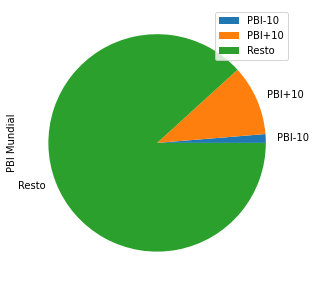

In [ ]:
PBIMasMigrantes = sum(mas_inmigrantes.head(10)["GDP"].fillna(0))
PBIMasEmigrantes = sum(mas_inmigrantes.tail(10)["GDP"].fillna(0))
restoPBI = sum(unificado["GDP"].fillna(0)) - PBIMasEmigrantes - PBIMasMigrantes

df = pd.DataFrame({"PBI Mundial": [PBIMasEmigrantes, PBIMasMigrantes, restoPBI],
                  },
                  index=['PBI-10', 'PBI+10', 'Resto'])
plot = df.plot.pie(y='PBI Mundial', figsize=(5, 5))

# 3 Análisis de migrantes en términos relativos

## 3.1 Porcentaje de migrantes respecto de la población

In [ ]:
#agregamos un indicador: % de migrantes respecto de a poblacion
unificado['Migrantes/Population'] = abs(100*(unificado['Migrants']/unificado['Population']))

**Países con más impacto de migrantes respecto su poblacion total**

In [ ]:
indicador1 = unificado.sort_values('Migrantes/Population', ascending = False)
indicador1.head(10)[['Population','Net change','Migrants','GDP','Migrantes/Population']]
#indicador1[indicador1['Migrants']<0].head(10)[['Population','Net change','Migrants','GDP','Migrantes/Population']]

,Population,Net change,Migrants,GDP,Migrantes/Population
Country,,,,,
Puerto Rico,"2,860,853.0","-72,555.0","-97,986.0","16,800.0",3.4
Bahrain,"1,701,575.0","60,403.0","47,800.0","16,900.0",2.8
Syria,"17,500,658.0","430,523.0","-427,391.0","3,300.0",2.4
Venezuela,"28,435,940.0","-79,889.0","-653,249.0","4,800.0",2.3
Maldives,"540,544.0","9,591.0","11,370.0","3,900.0",2.1
Oman,"5,106,626.0","131,640.0","87,400.0","13,100.0",1.7
South Sudan,"11,193,725.0","131,612.0","-174,200.0",NaN,1.6
Luxembourg,"625,978.0","10,249.0","9,741.0","55,100.0",1.6
Samoa,"198,414.0","1,317.0","-2,803.0","5,600.0",1.4


## 3.2 Porcentaje de migrantes respecto de la variación anual de la población

In [ ]:
#impacto de migrantes en el cambio poblacional
unificado['Migrantes/Net change'] = abs(100*(unificado['Migrants']/unificado['Net change']))

**Países con más impacto de migrantes respecto su variación anual**

In [ ]:
indicador2 = unificado.sort_values('Migrantes/Net change', ascending = False)
indicador2.head(10)[['Population','Net change','Migrants','GDP','Migrantes/Net change']]

,Population,Net change,Migrants,GDP,Migrantes/Net change
Country,,,,,
Guadeloupe,"400,124.0",68.0,"-1,440.0","8,000.0","2,117.6"
North Macedonia,"2,083,374.0",-85.0,"-1,000.0",NaN,"1,176.5"
Venezuela,"28,435,940.0","-79,889.0","-653,249.0","4,800.0",817.7
Slovenia,"2,078,938.0",284.0,"2,000.0","19,000.0",704.2
Montenegro,"628,066.0",79.0,-480.0,NaN,607.6
Albania,"2,877,797.0","-3,120.0","-14,000.0","4,500.0",448.7
Estonia,"1,326,535.0",887.0,"3,911.0","12,300.0",440.9
Martinique,"375,265.0",-289.0,-960.0,"14,400.0",332.2
U.S. Virgin Islands,"104,425.0",-153.0,-451.0,NaN,294.8


## 3.3 Países donde la migración impacta tanto en su población como en su variación neta

In [ ]:
#se podria analizar la combinacion de ambos indicadores, 
#es decir países donde la migracion impacta tanto en su poblacion como en su variacion neta
#por ejemplo Venezuela aparece en ambas listas

unificado['Doble impacto'] = unificado['Migrantes/Net change']*unificado['Migrantes/Population']

**Países donde la "emigración" impacta tanto en su población como en su variación neta**

In [ ]:
indicador3 = unificado.sort_values('Doble impacto', ascending = False)
indicador3[indicador3['Migrants']<0].head(10)[['Population','Net change','Migrants','GDP','Doble impacto']]

,Population,Net change,Migrants,GDP,Doble impacto
Country,,,,,
Venezuela,"28,435,940.0","-79,889.0","-653,249.0","4,800.0","1,878.5"
Guadeloupe,"400,124.0",68.0,"-1,440.0","8,000.0",762.1
Puerto Rico,"2,860,853.0","-72,555.0","-97,986.0","16,800.0",462.6
Samoa,"198,414.0","1,317.0","-2,803.0","5,600.0",300.7
Syria,"17,500,658.0","430,523.0","-427,391.0","3,300.0",242.4
Albania,"2,877,797.0","-3,120.0","-14,000.0","4,500.0",218.3
South Sudan,"11,193,725.0","131,612.0","-174,200.0",NaN,206.0
U.S. Virgin Islands,"104,425.0",-153.0,-451.0,NaN,127.3
Guyana,"786,552.0","3,786.0","-6,000.0","4,000.0",120.9


GDP promedio de este grupo de países



In [ ]:
#gdp promedio de este grupo
round(indicador3[indicador3['Migrants']<0].head(10)['GDP'].mean())

7300

**Países donde la "inmigración" impacta tanto en su población como en su variación neta**

In [ ]:
indicador3[indicador3['Migrants']>0].head(10)[['Population','Net change','Migrants','GDP','Doble impacto']]

,Population,Net change,Migrants,GDP,Doble impacto
Country,,,,,
Maldives,"540,544.0","9,591.0","11,370.0","3,900.0",249.4
Bahrain,"1,701,575.0","60,403.0","47,800.0","16,900.0",222.3
Luxembourg,"625,978.0","10,249.0","9,741.0","55,100.0",147.9
Germany,"83,783,942.0","266,897.0","543,822.0","27,600.0",132.3
Estonia,"1,326,535.0",887.0,"3,911.0","12,300.0",130.0
Oman,"5,106,626.0","131,640.0","87,400.0","13,100.0",113.6
Qatar,"2,881,053.0","48,986.0","40,000.0","21,500.0",113.4
Austria,"9,006,398.0","51,296.0","65,000.0","30,000.0",91.5
Slovenia,"2,078,938.0",284.0,"2,000.0","19,000.0",67.7


GDP promedio de este grupo de países

In [ ]:
#gdp promedio de este grupo
round(indicador3[indicador3['Migrants']>0].head(10)['GDP'].mean())

22156

El grupo de países que más gente pierde tiene un GDP per cápita promedio 3 veces menor respecto de los países que más gente reciben respecto de su población y variación neta en 2022.

## 3.4 Gráfico que muestra los países con alta emigración que impacta en su crecimiento poblacional

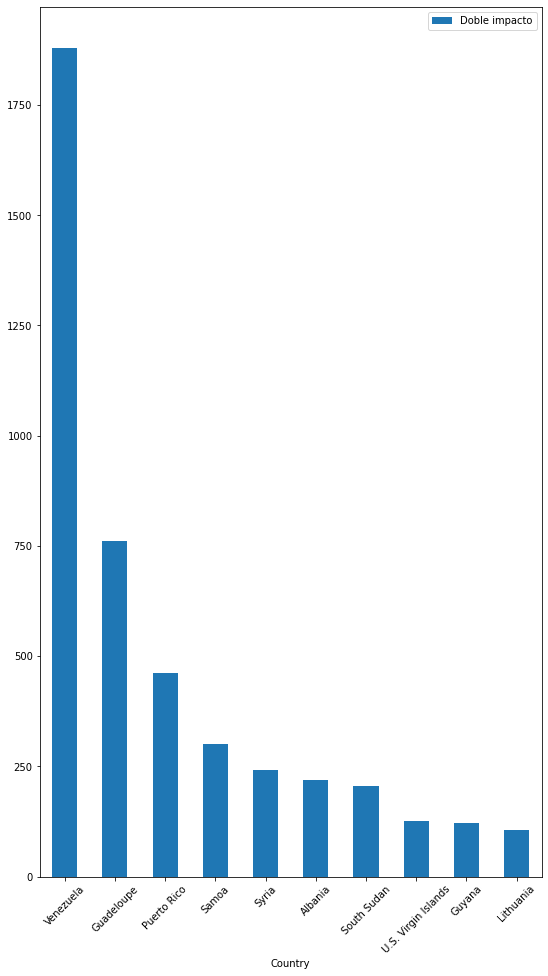

In [ ]:
grafico3 = indicador3[indicador3['Migrants']<0].head(10).reset_index()
grafico3.plot.bar(x='Country', y='Doble impacto', rot=45, figsize=(9,16))

# 4 Análisis de migrantes por Región

## 4.1 Agrupar por regiones y totalizar

In [ ]:
indicador4 = unificado[['Region','Population','Net change','Migrants']].groupby(["Region"]).sum()
indicador4.sort_values('Migrants', ascending = False, inplace=True)
indicador4

,Population,Net change,Migrants
Region,,,
WESTERN EUROPE,"424,672,614.0","1,023,086.0","1,320,767.0"
NORTHERN AMERICA,"368,863,853.0","2,268,711.0","1,196,838.0"
NEAR EAST,"257,443,753.0","4,102,574.0","219,272.0"
OCEANIA,"42,491,009.0","548,392.0","159,238.0"
C.W. OF IND. STATES,"294,582,047.0","1,006,165.0","130,138.0"
BALTICS,"5,935,022.0","-56,996.0","-43,706.0"
NORTHERN AFRICA,"202,383,258.0","3,415,728.0","-99,869.0"
EASTERN EUROPE,"100,232,932.0","-324,314.0","-138,295.0"
SUB-SAHARAN AFRICA,"995,486,343.0","25,234,349.0","-145,124.0"


## 4.2 Gráfico que muestra el total de migrantes por región

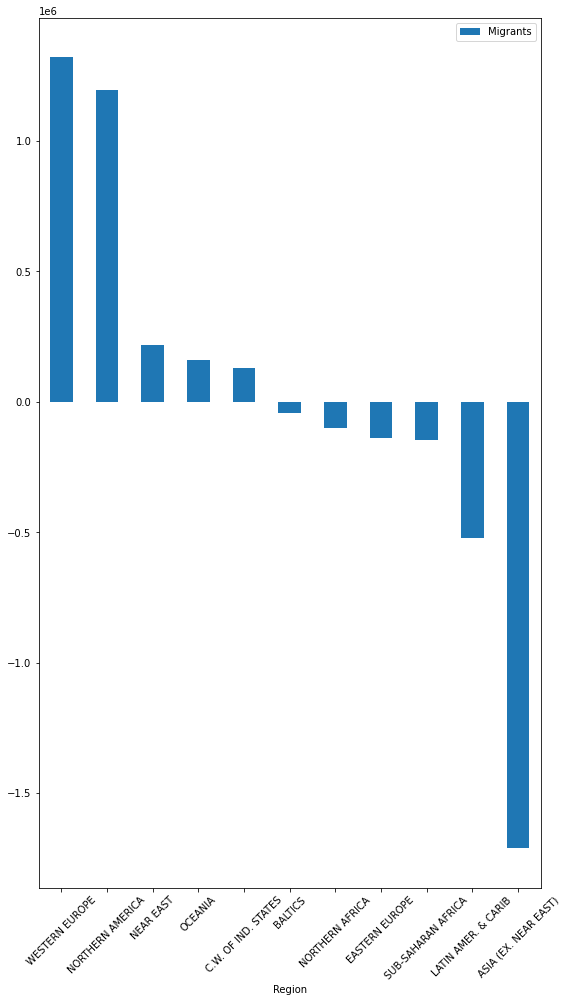

In [ ]:
grafico4 = indicador4.reset_index()
grafico4.plot.bar(x='Region', y='Migrants', rot=45, figsize=(9,16))

## 4.3 Tabla que muestra el GDP per capita por región en orden descendente

In [ ]:
indicador5 = unificado[['Region','GDP']].groupby(["Region"]).mean()
indicador5.sort_values('GDP', ascending = False, inplace=True)
indicador5

,GDP
Region,
NORTHERN AMERICA,"30,900.0"
WESTERN EUROPE,"27,620.0"
NEAR EAST,"11,850.0"
BALTICS,"11,300.0"
EASTERN EUROPE,"9,530.0"
OCEANIA,"8,611.1"
LATIN AMER. & CARIB,"8,107.9"
ASIA (EX. NEAR EAST),"8,030.4"
NORTHERN AFRICA,"5,460.0"


* Podemos ver que las zonas que más gente reciben tiene un PBI promedio en el tope de la lista.
* Pero las zonas que más gente pierden no necesariamente tienen un PBI promedio bajo. Latinoamerica y Asia tiene un PBI promedio bastante bueno sin embargo son zonas que pierden mucha gente.
Habría que indagar en otras causas para explicar este fenómeno. 

## 4.4 Gráfico que muestra la relación entre la migración y el GDP per capita por país

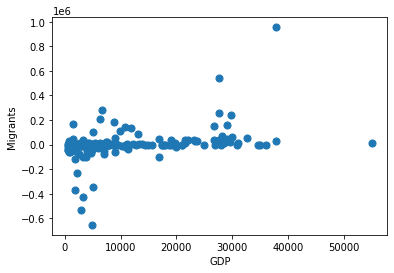

In [ ]:
unificado
unificado.plot.scatter('GDP', 'Migrants', s = 50)